## Random Forest Regression:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

-  In this dataset we will use X-ray signals to determine rock density.
-  Based on a rebound signal strength in mHz, we can estimate a density of rock in kg/m3
-  We have some experimental results based on lab tests on a variety of rock samples. 

### Linear Regression:

In [2]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.columns = ['Signal', 'Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

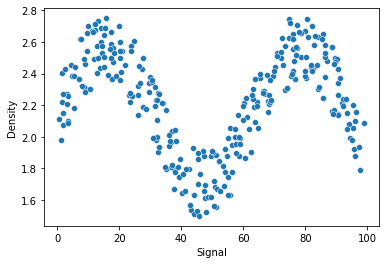

In [6]:
sns.scatterplot(x='Signal', y='Density', data=df)

In [15]:
X = df['Signal'].values.reshape(-1,1)

In [16]:
y = df['Density']

In [17]:
X

array([[72.94512436],
       [14.2298772 ],
       [36.59733361],
       [ 9.57889939],
       [21.76589708],
       [89.64797256],
       [69.49273293],
       [20.15052036],
       [82.25633703],
       [64.42480217],
       [38.42706534],
       [ 9.89157994],
       [31.7410984 ],
       [90.4960676 ],
       [13.19342555],
       [ 9.55665673],
       [26.00550577],
       [24.81782725],
       [40.29631043],
       [29.60926638],
       [76.57740035],
       [82.61598742],
       [ 1.66229161],
       [17.32519267],
       [35.05157441],
       [63.47748521],
       [13.68823691],
       [17.49779896],
       [ 1.86382485],
       [17.96684624],
       [23.9388581 ],
       [66.36433682],
       [34.02717884],
       [76.03302052],
       [82.66759709],
       [66.78076834],
       [47.4528517 ],
       [74.02752794],
       [86.20473574],
       [72.24767039],
       [80.33899095],
       [36.86719496],
       [31.92883259],
       [85.68535822],
       [78.45459768],
       [19

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr_model = LinearRegression()

In [22]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [23]:
lr_preds = lr_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

The Mean Absolute Error (MAE) doesn't seem to be too bad.

In [26]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [27]:
signal_range = np.arange(0,100)

In [28]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [29]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

In [30]:
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

The problem is going to be appreciated when we plot these results:

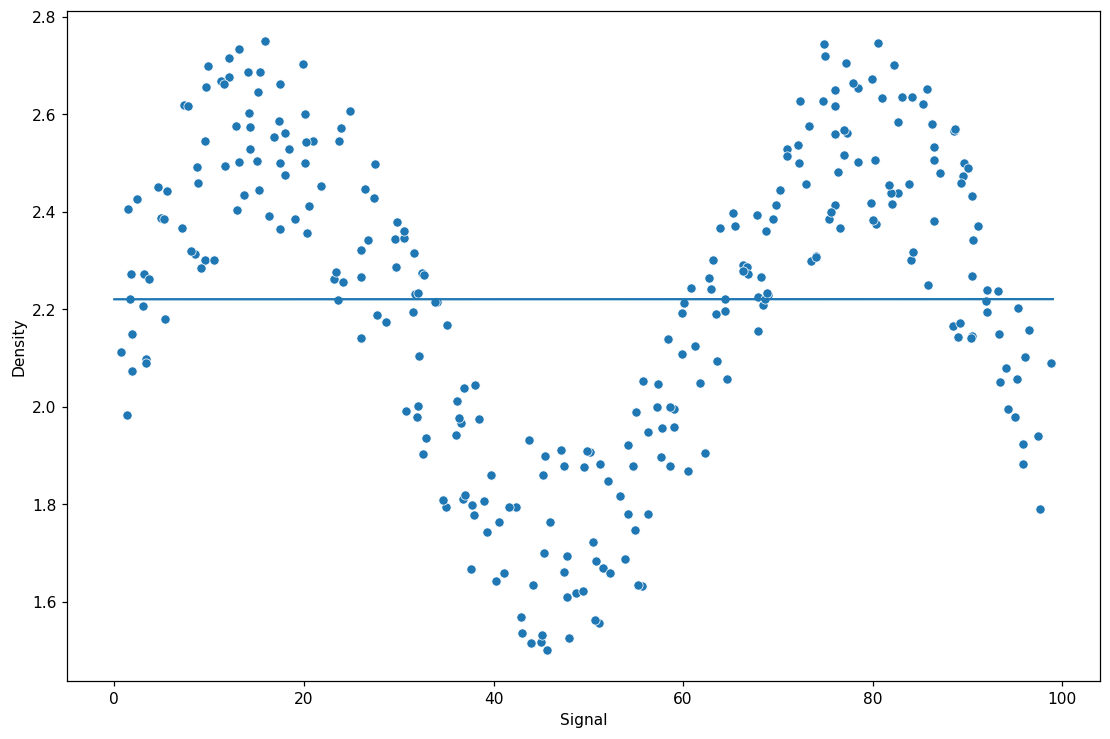

In [32]:
plt.figure(figsize=(12,8), dpi=111)
sns.scatterplot(x='Signal', y='Density', data=df)

plt.plot(signal_range, signal_preds)
 

So basically the problem is that a Linear Regression is only guessing an average line. 

In conclusion, this model is not feasible for this particular dataset.

In [49]:
# Create a general formula for models:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # FIT MODEL TRAINING DATA:
    model.fit(X_train, y_train)
    
    # GET METRICS:
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    
    # PLOT RESULTS MODEL SIGNAL RANGE:
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8), dpi=200)
    sns.scatterplot(x='Signal', y='Density', data=df, color='black')
    
    plt.plot(signal_range, output)
    
    

RMSE: 0.2570051996584629
MAE: 0.211198973318633


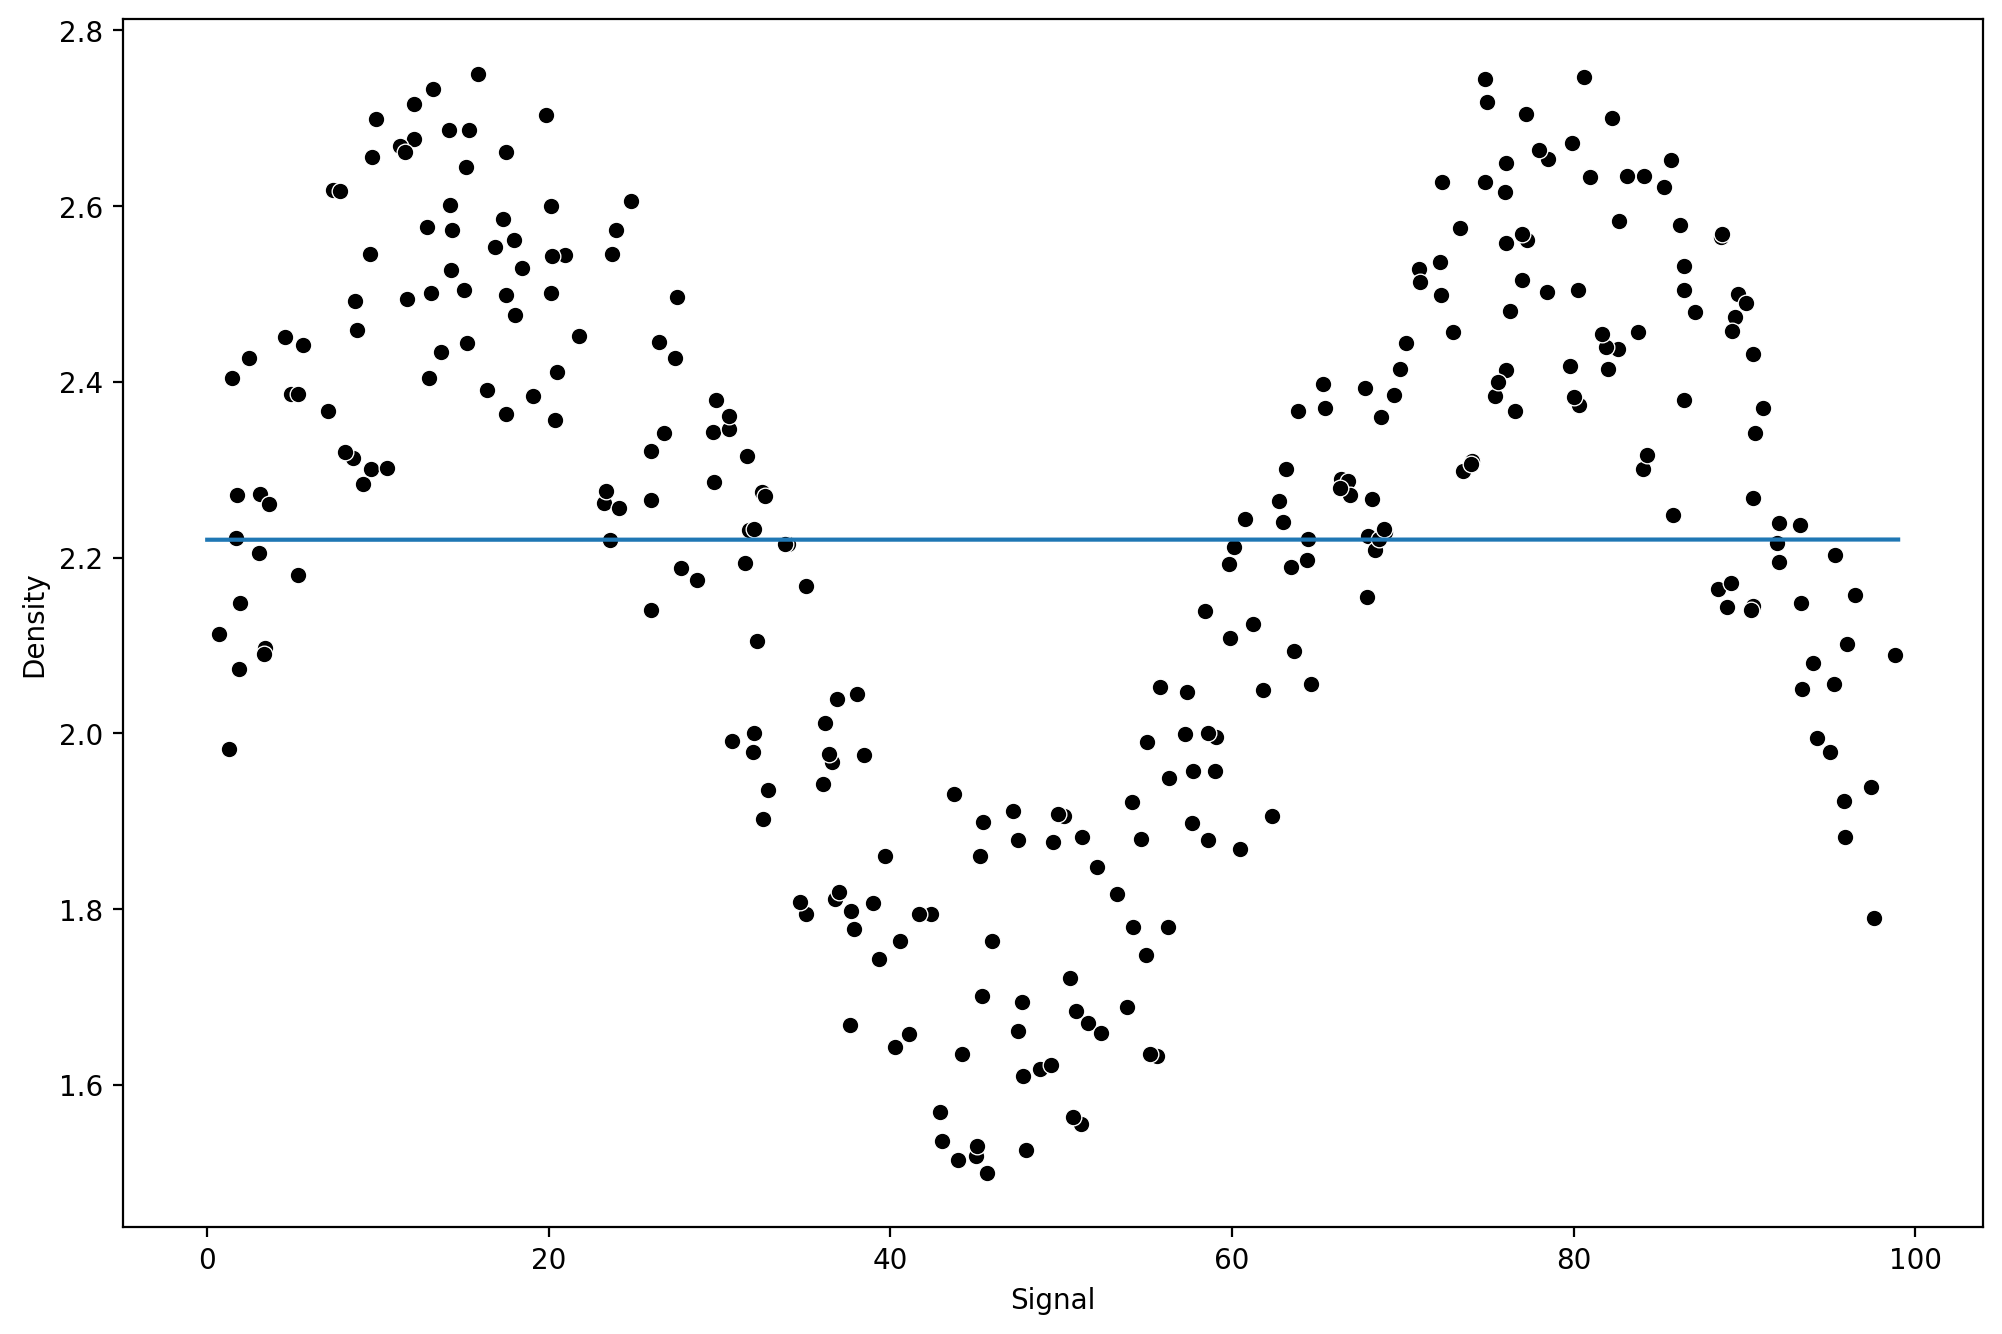

In [50]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

### Create a pipeline for the Polynomial Regression:

In [51]:
from sklearn.pipeline import make_pipeline

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
pipe = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())

RMSE: 0.14452812867837028
MAE: 0.11864311658362518


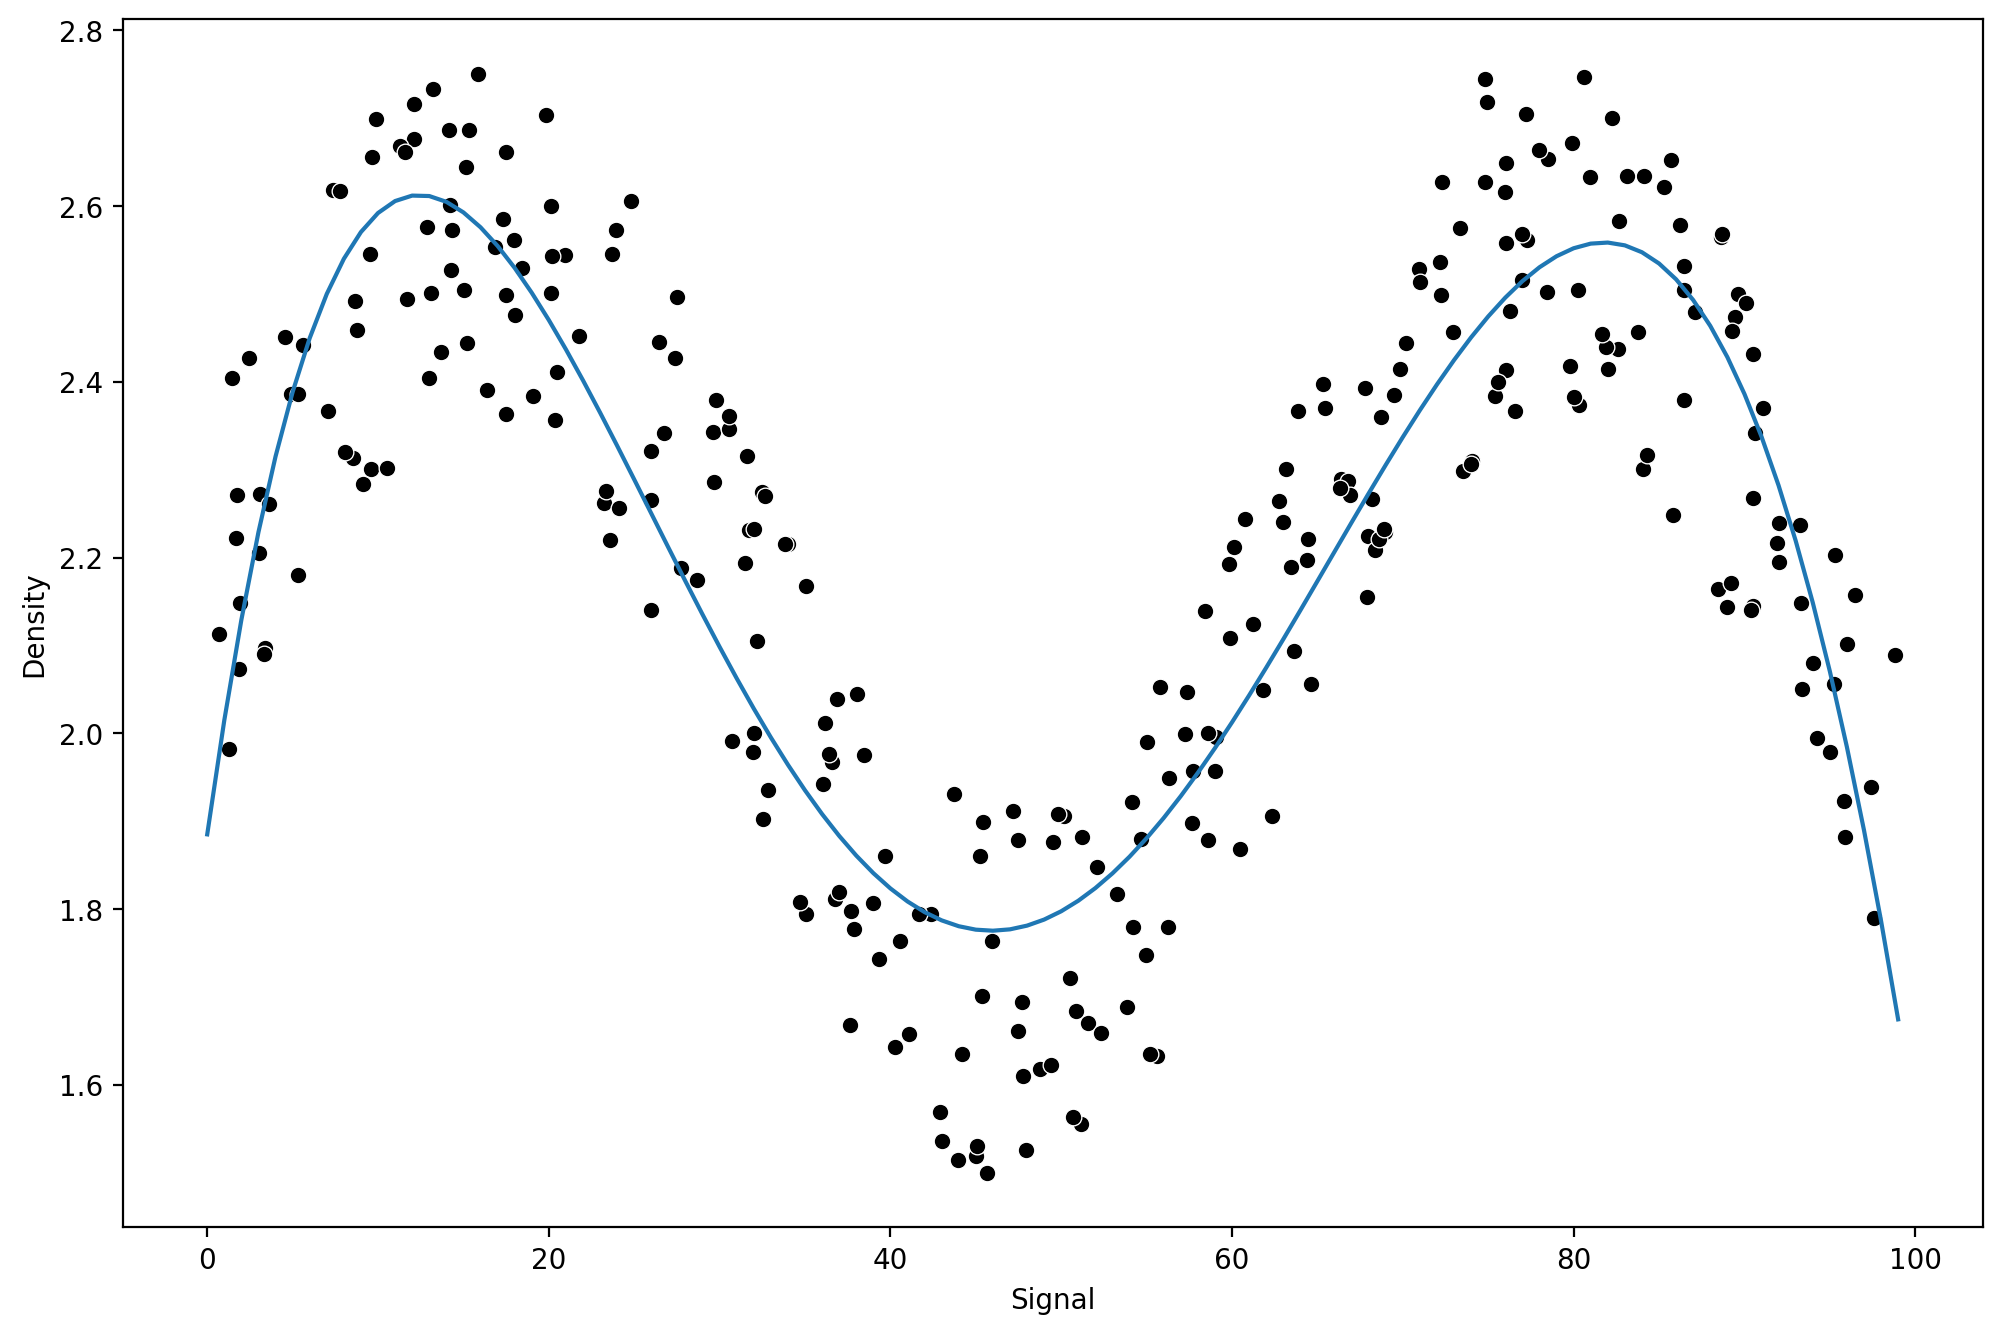

In [62]:
run_model(pipe, X_train, y_train, X_test, y_test)

### K-Neighbors Regressor:

In [63]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
k_values = [1,5,10]


RMSE: 0.1523487028635337
MAE: 0.11877297474442378
RMSE: 0.13730685016923647
MAE: 0.12198383614100558
RMSE: 0.13277855732740926
MAE: 0.11635971693292672


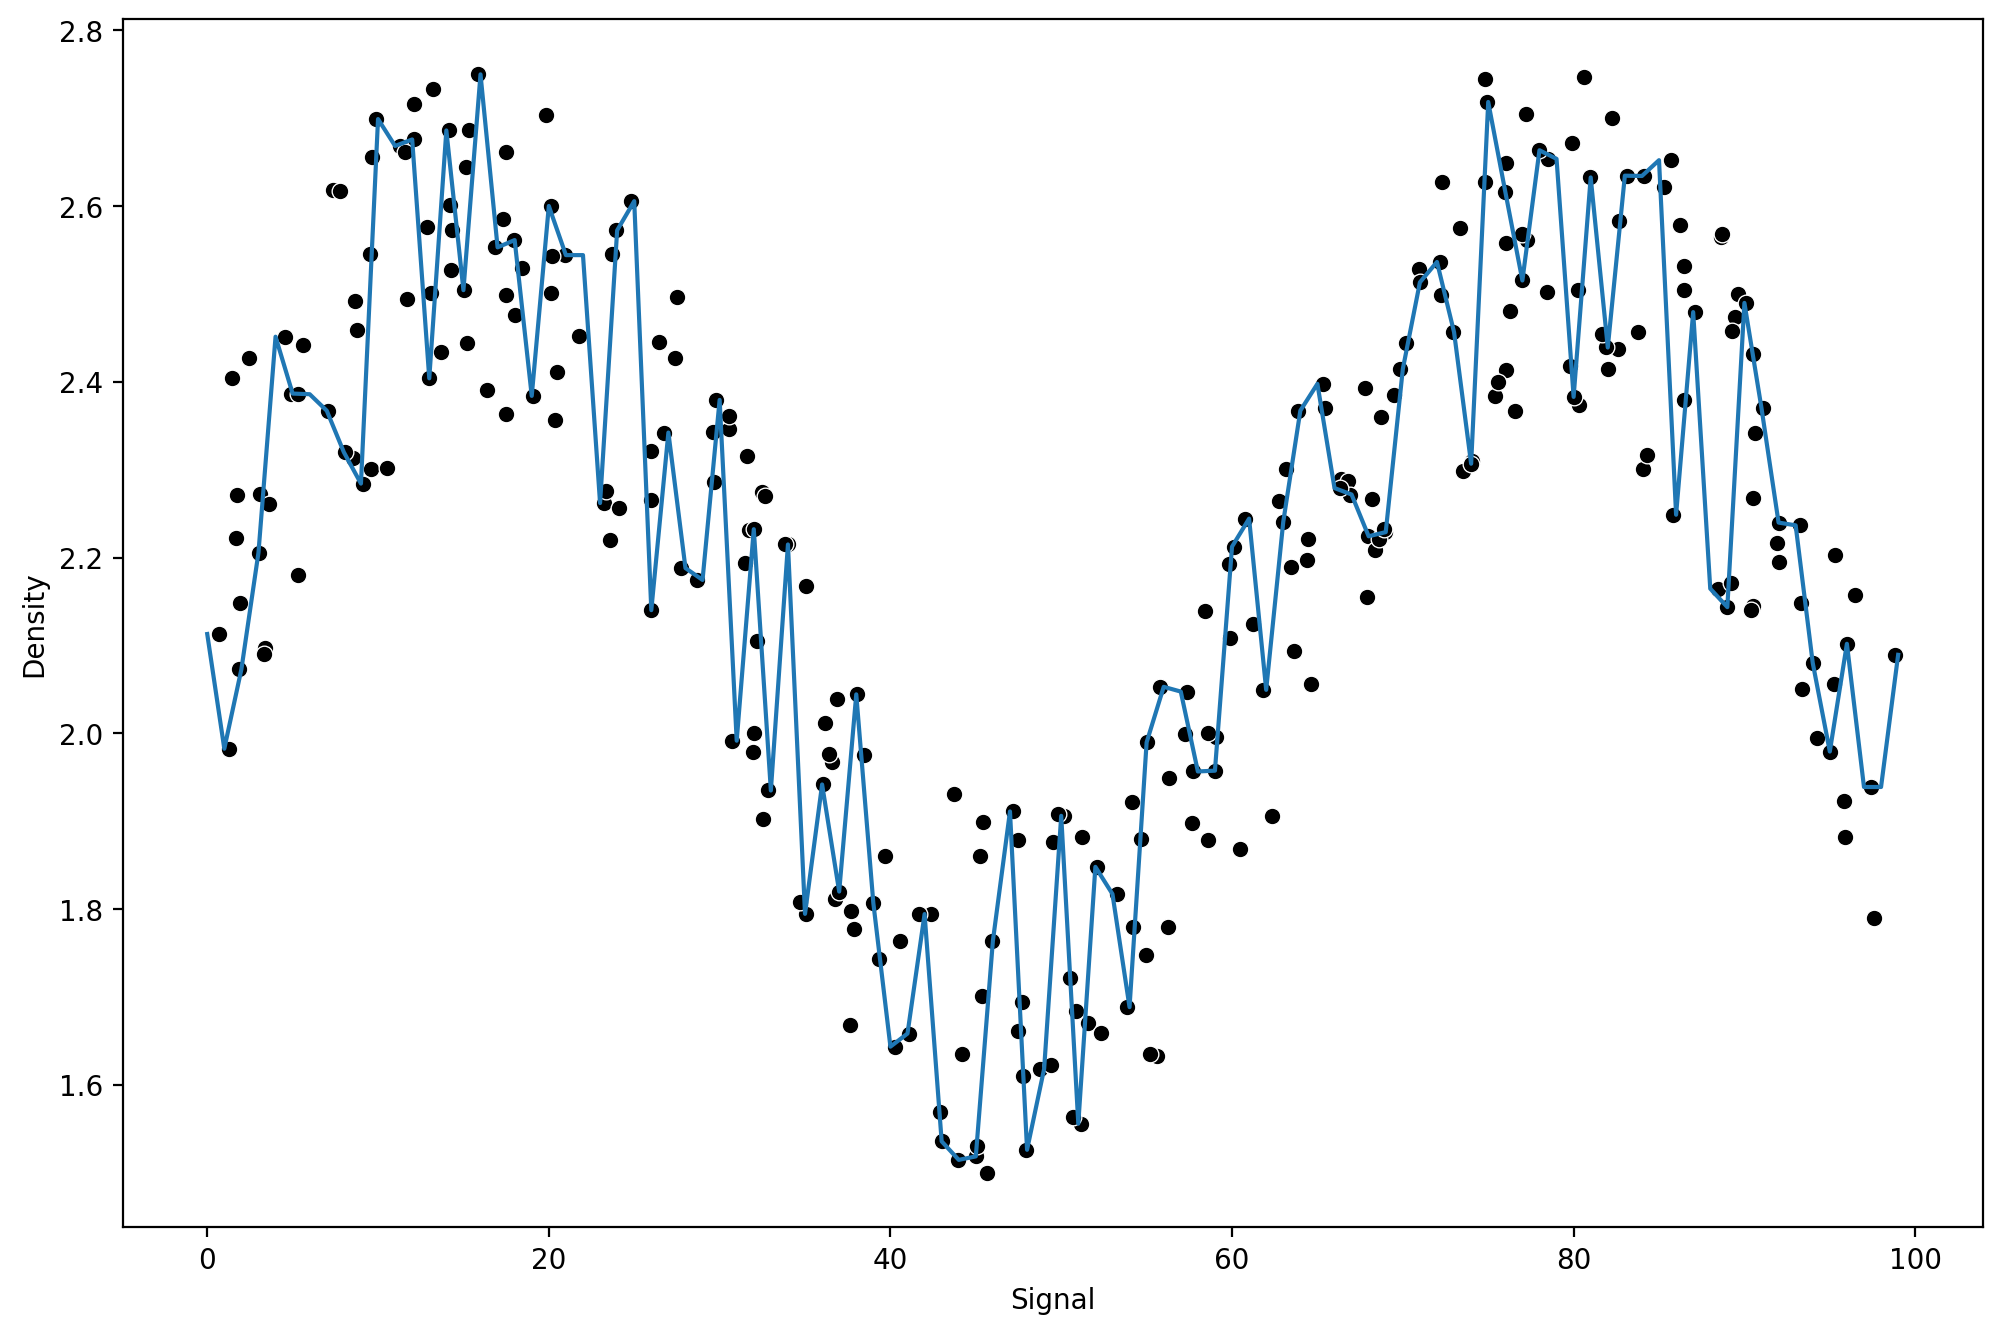

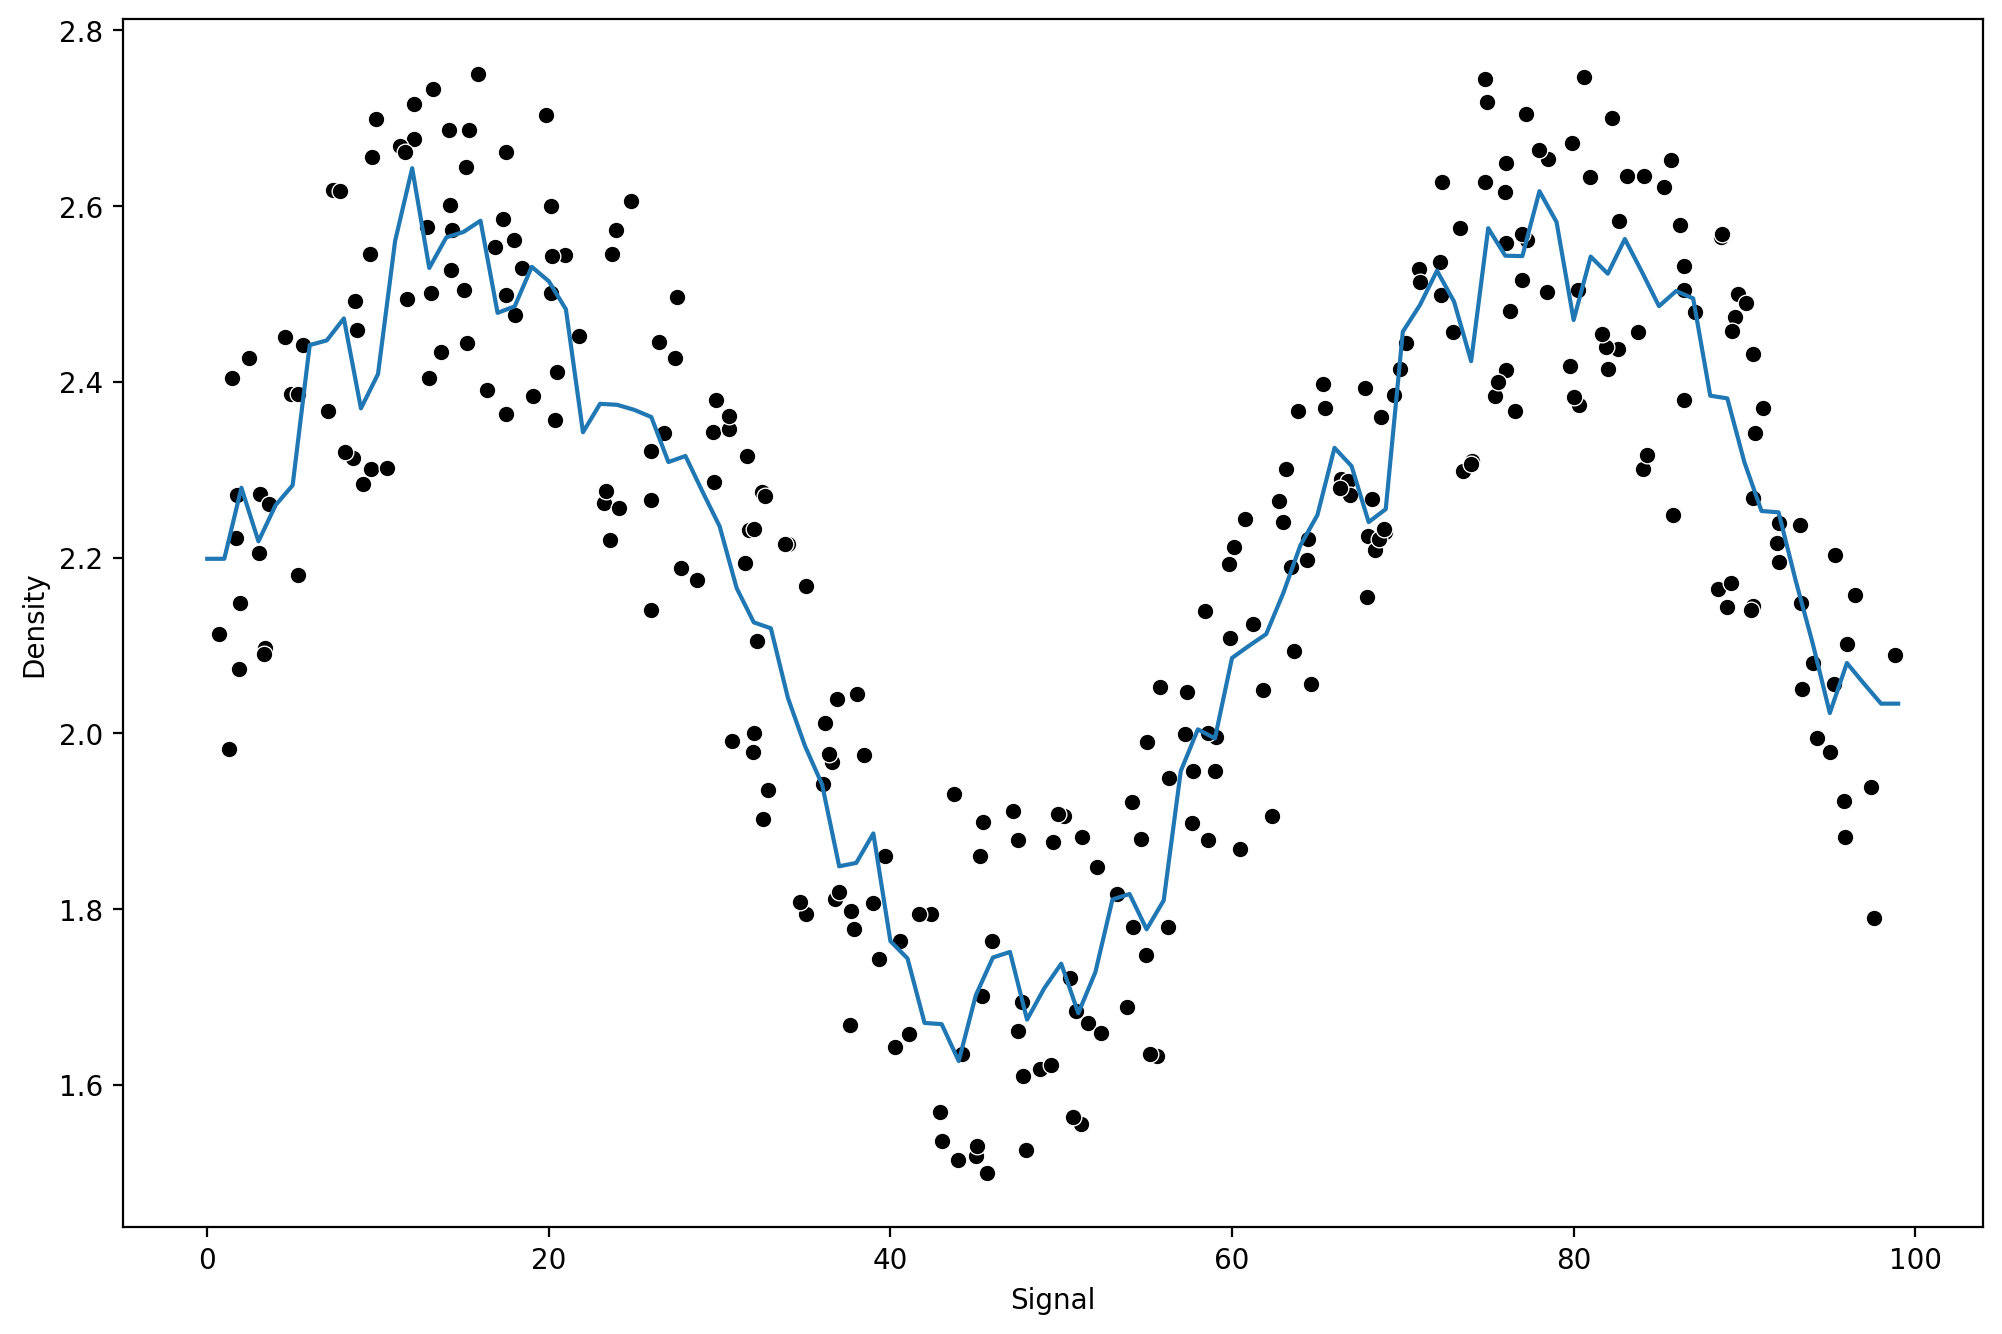

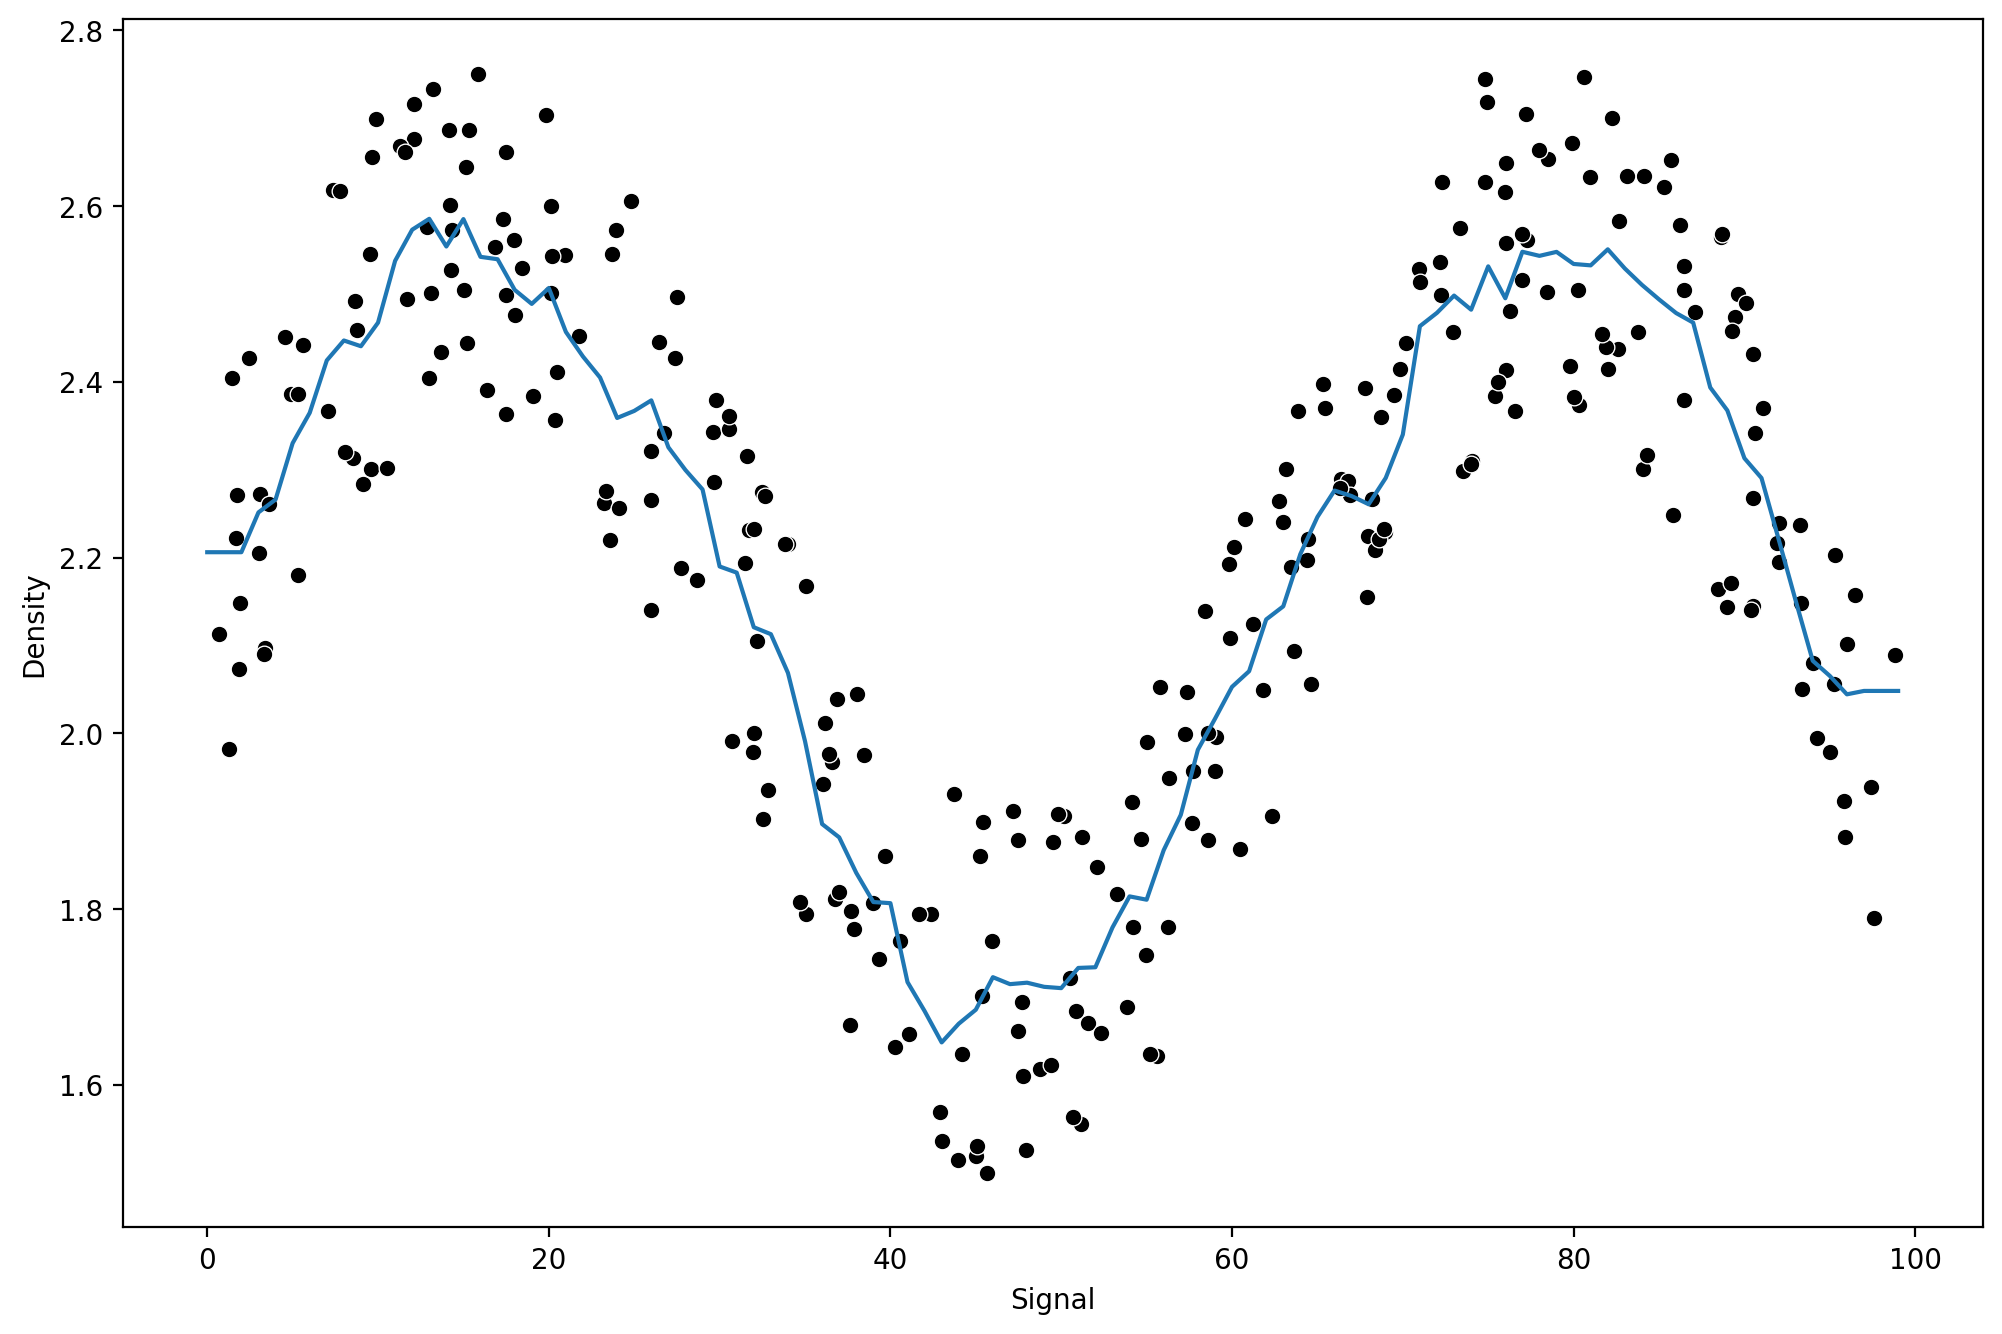

In [65]:
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

So for KNN, we can expect with low values of K very noisy fits, but for higher values, less noise, and more bias. 

### Decision Tree:

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
model = DecisionTreeRegressor()

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


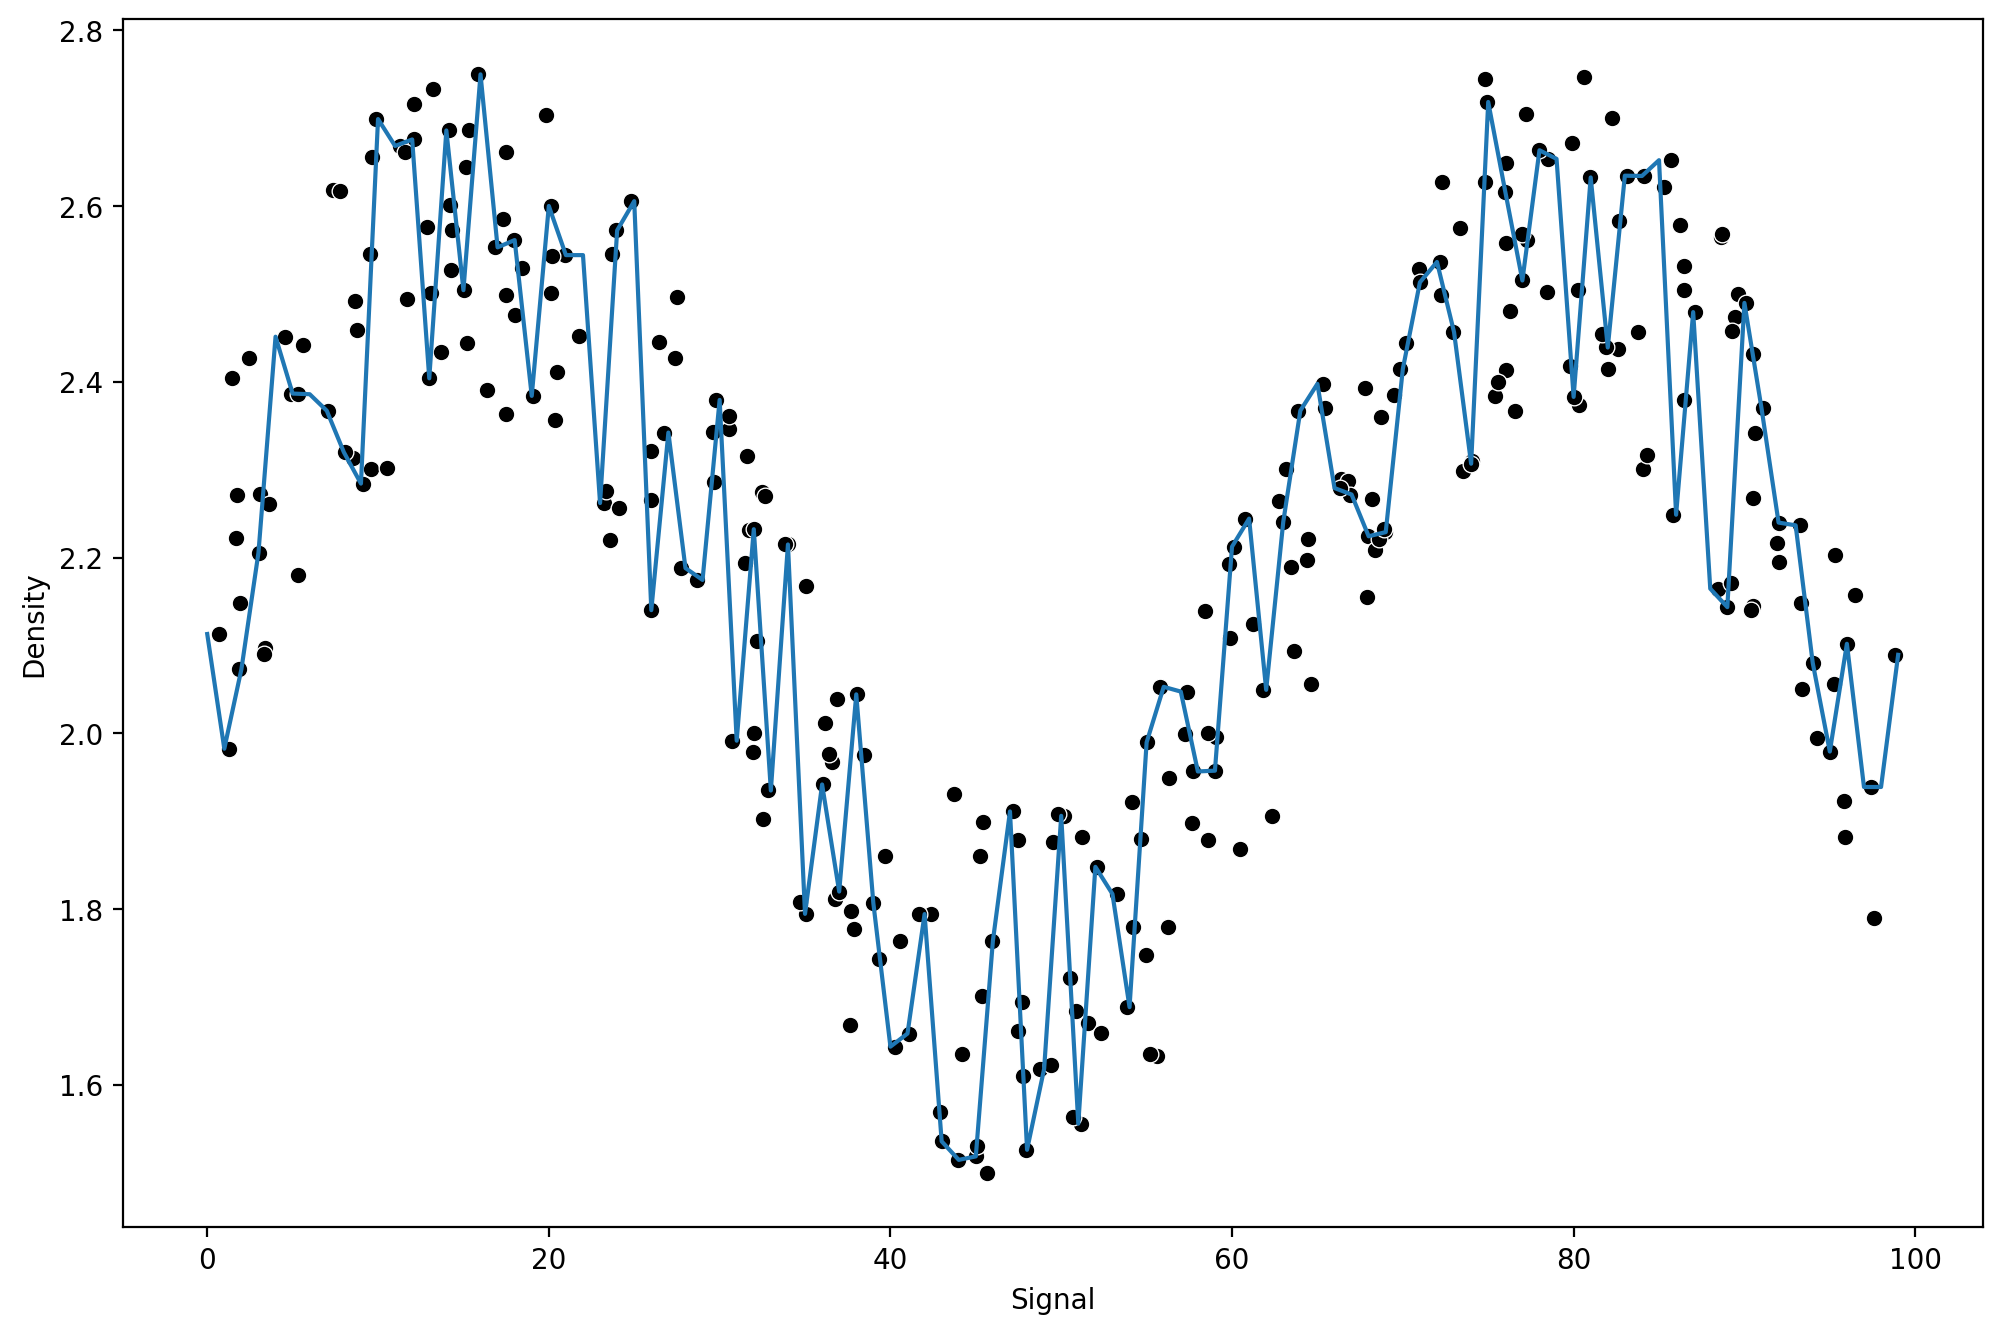

In [68]:
run_model(model, X_train, y_train, X_test, y_test)

So we got a noisy signal that fits very well the data.

### Support Vector Machines (SVM):

In [69]:
from sklearn.svm import SVR

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
svr = SVR()

In [72]:
param_grid = {'C':[0.01, 0.1, 1.0, 5, 10, 100, 1000],
             'gamma':['auto', 'scale']
             }

grid = GridSearchCV(svr, param_grid=param_grid)

RMSE: 0.12646999302047557
MAE: 0.10854210121349125


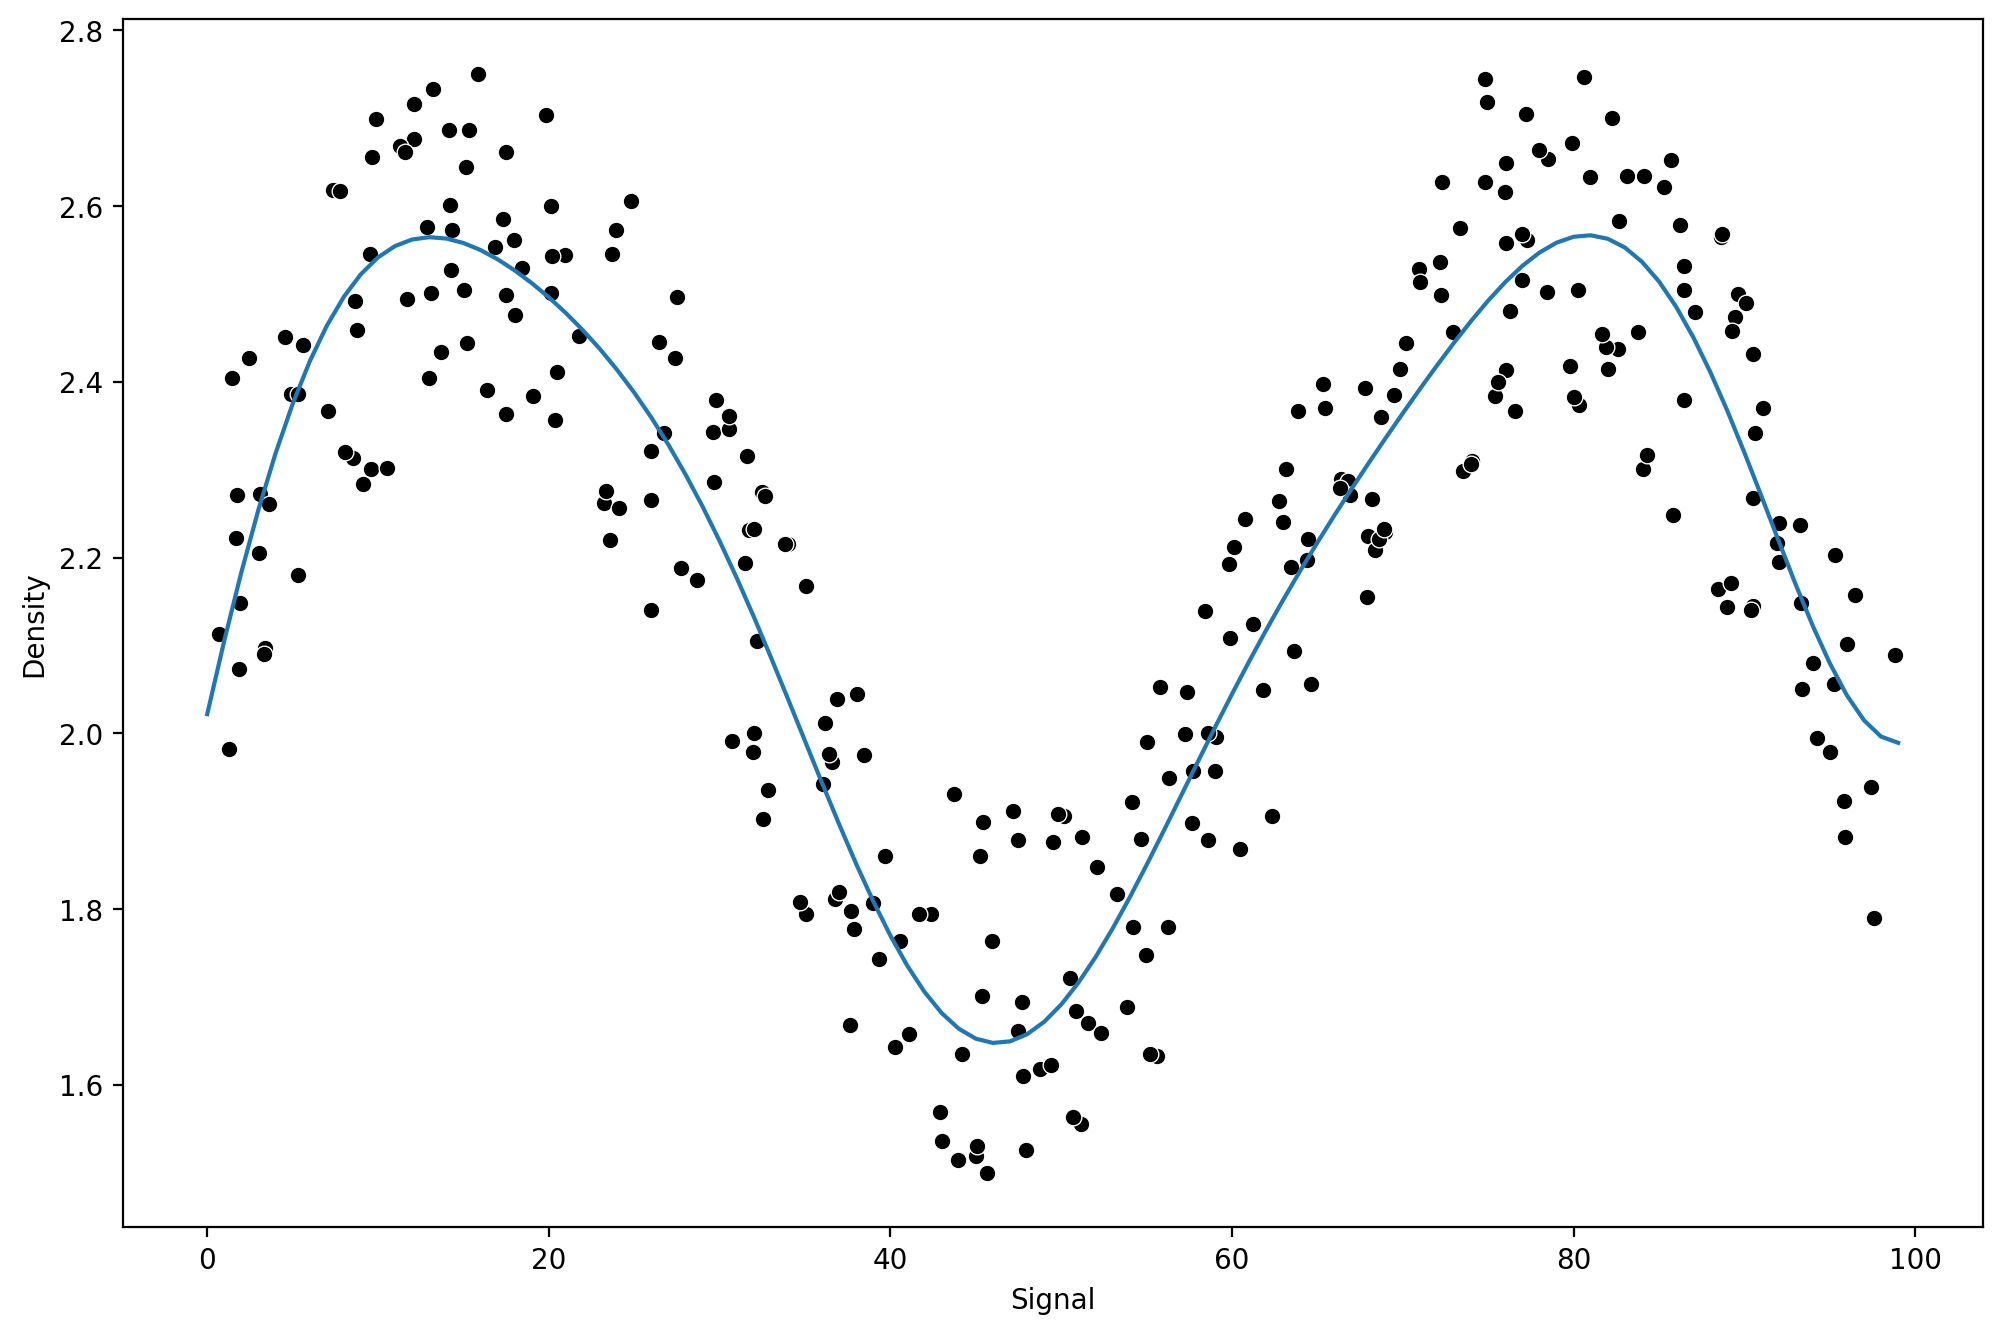

In [73]:
run_model(grid, X_train, y_train, X_test, y_test)

The support vector model doesn't allow high variance models due to the fact that it respects the margins.

### Random Forest Regression:

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rfr = RandomForestRegressor(n_estimators=100)

RMSE: 0.13133727164587464
MAE: 0.10806353991542468


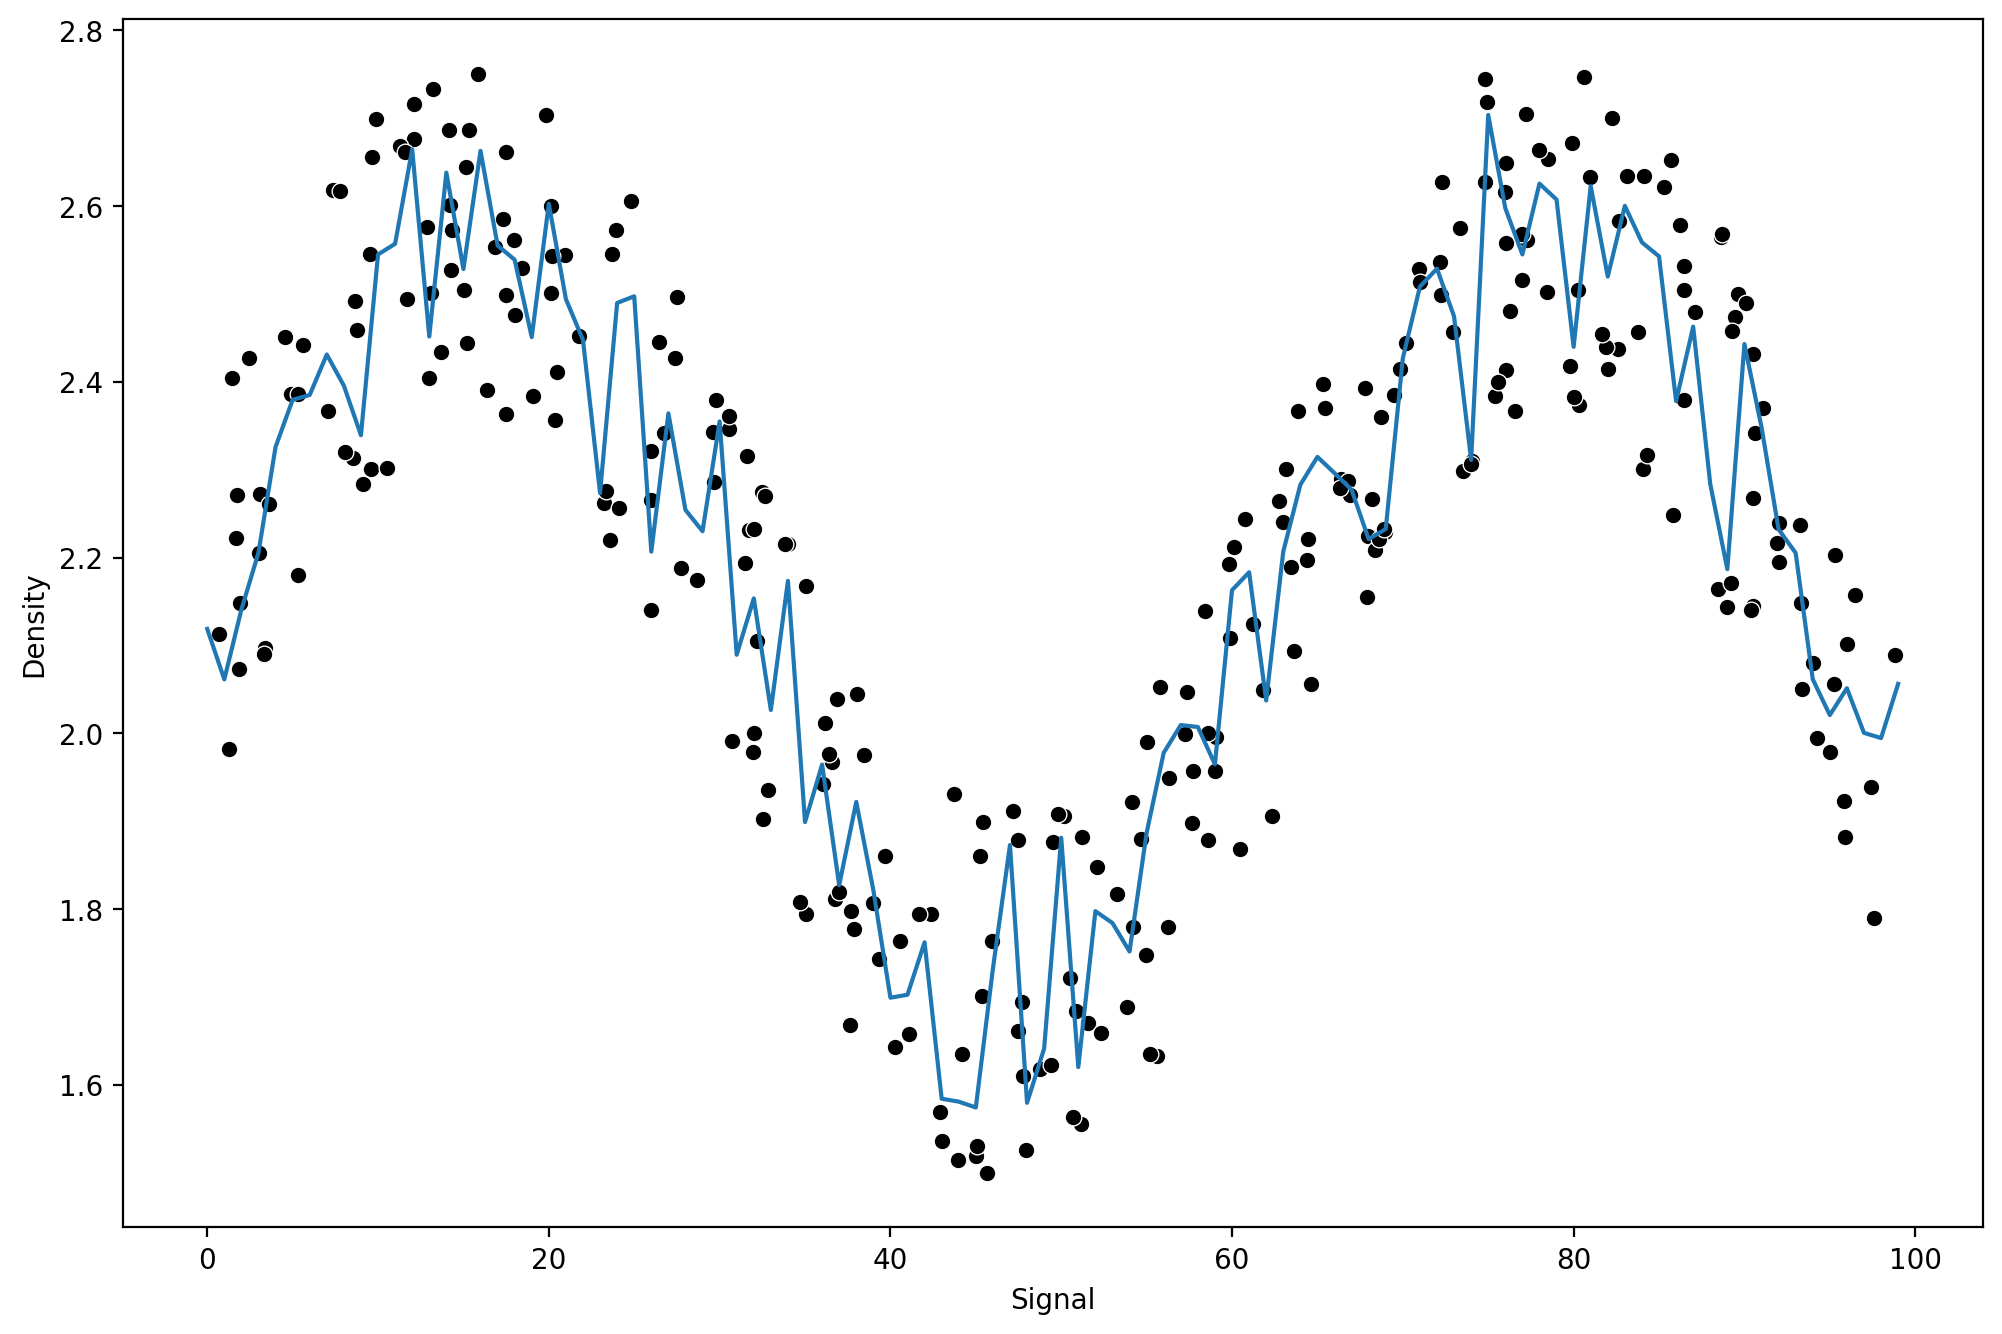

In [78]:
run_model(rfr, X_train, y_train, X_test, y_test)

It has noise, but has enough bias to fit to the curve.

### Gradient Boosting Regressor:

In [80]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

RMSE: 0.13294148649584667
MAE: 0.11318284854800689


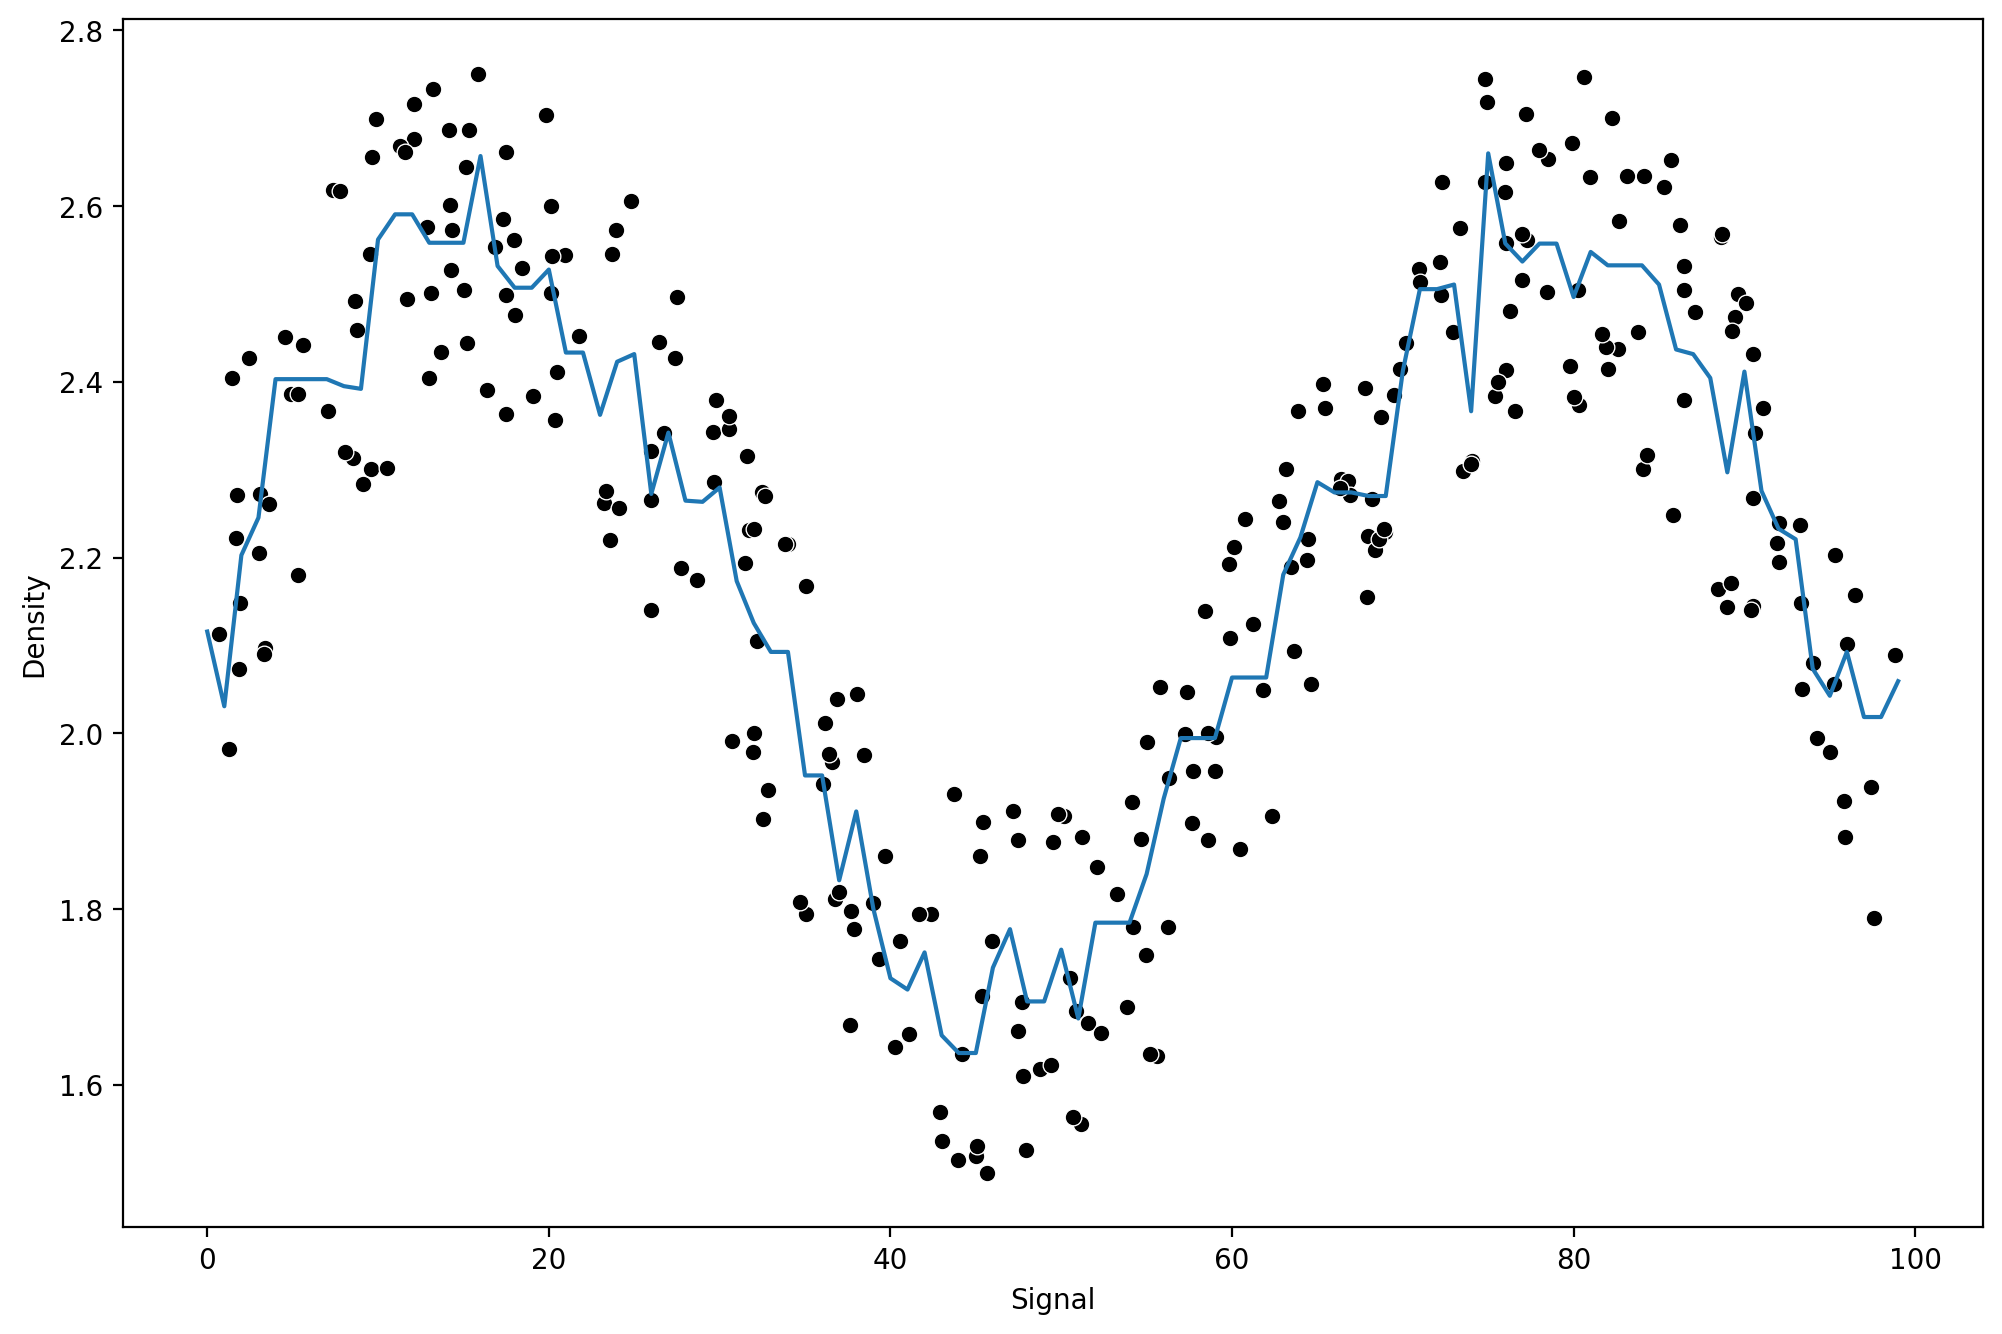

In [81]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

### Ada Boost:

RMSE: 0.13253963306148703
MAE: 0.11287636577145363


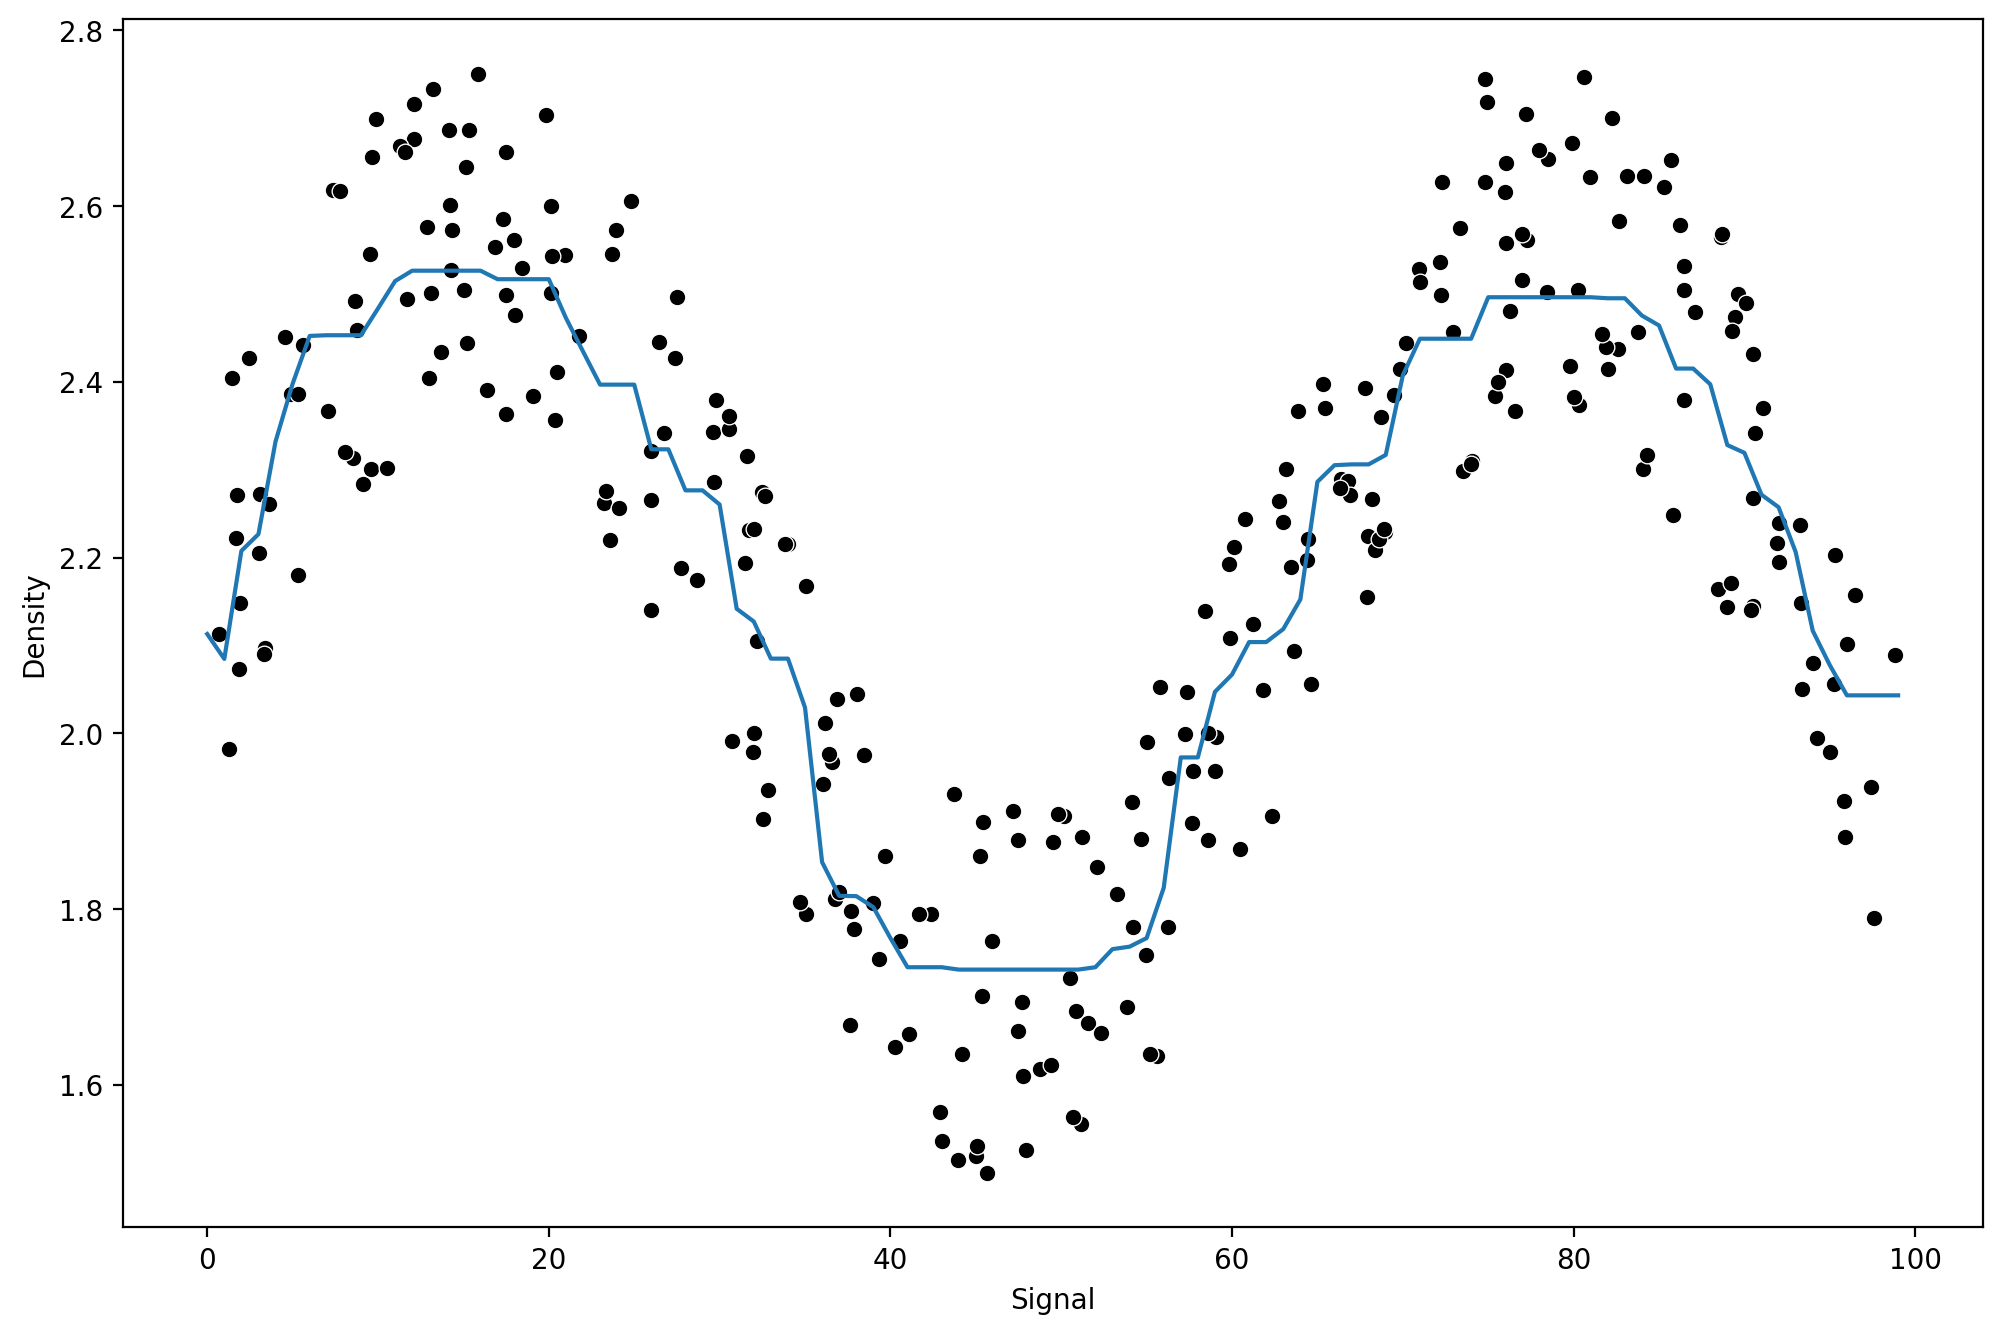

In [82]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)